# Titanic

## Define our environment

Download PROSE from private pip channel.

In [17]:
!pip install prose-codeacceleratorlab --pre --extra-index-url https://prose-python-packages.azurewebsites.net

Looking in indexes: https://pypi.org/simple, https://prose-python-packages.azurewebsites.net


Download seaborn

In [18]:
! pip install seaborn

Load all the libraries that we're planning to use

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# ignore warnings to simplify output
import warnings
warnings.filterwarnings('ignore')

Acquire the data from local files

In [4]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
combine = [train_df, test_df]

What features are available in this dataset?

In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Preview the data:

* Categorical: Survived, Sex, Embarked
* Ordinal: Pclass
* Continuous: Age, Fare
* Discrete: SibSp, Parch

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Examine null vs. non-null for the train and the test datasets. Rank from the most missing to the least for train and test datasets:

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Let's examine the statistical distribution of data in the numerical features:

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's examine the distribution of categorical features:

In [10]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Meo, Mr. Alfonzo",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


## Manually analyze by pivoting features

Look at survival based on Pclass:

In [11]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Look at survival based on Sex:

In [12]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Look at survival based on SibSp (whether traveling alone):

In [13]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Look at survival based on Parch:

In [15]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data

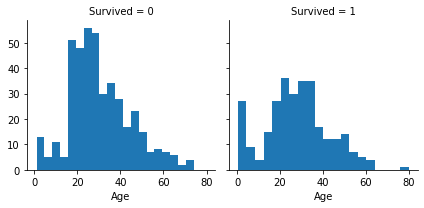

In [16]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

## PROSE

Section where we generate a derived column using PROSE

In [19]:
import prose.codeaccelerator as cx
import prose.codeacceleratorlab as cxlab


    PROSE CodeAccelerator SDK Telemetry
    -----------------------------------
    The PROSE CodeAccelerator SDK includes a telemetry feature that collects
    usage information. It is important that the PROSE team understands how the
    SDK is being used so that we can improve it.

    The data collected is not used to identify any person.

    The PROSE CodeAccelerator SDK telemetry feature is enabled by default. You
    can opt-out of the telemetry feature by setting an environment variable
    PROSE_TELEMETRY_OPTOUT (for example, 'export' on macOS/Linux, 'set' on
    Windows) to any value.



In [22]:
df = cx.read("data/train.csv").data
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
5,6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C


In [31]:
df = train_df.data

AttributeError: 'DataFrame' object has no attribute 'data'

In [29]:
b2 = cxlab.DeriveValueBuilder(train_df[0:20])
b2.examples[train_df.loc[0]] = "Mr."
b2.examples[train_df.loc[1]] = "Mrs."
r2 = b2.learn()
r2

TypeError: nan has type float, but expected one of: bytes, unicode

Prose is uncertain about Row 18 (see suggested_examples above). We provide a third example, and re-learn the program.

In [24]:
b2.examples[df.loc[18]] = "Mrs."
r2 = b2.learn()
r2

DeriveValueLearnResult
----
code
----
import regex

def derive_value_program(_0, _1, _2, _3, _4, _5, _6, _7, _8, _9, _10, _11):
    index1 = regex.search(r"\p{Zs}*,\p{Zs}*", _3).end()
    pattern_match = regex.search(r"\p{Zs}*\ \p{Zs}*", _3[index1:])
    index2 = index1 + pattern_match.start()
    return _3[index1:index2]





------------
preview_data
------------
  PassengerId Survived Pclass  \
0           1        0      3   
1           2        1      1   
2           3        1      3   
3           4        1      1   
4           5        0      3   

                                                Name     Sex Age SibSp Parch  \
0                            Braund, Mr. Owen Harris    male  22     1     0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38     1     0   
2                             Heikkinen, Miss. Laina  female  26     0     0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35     1     0   
4                           Allen

We can now use the synthesized program to populate all cells of the new column. To make the demo shorter, one can give the three examples upfront. The longer demo just illustrates one other aspect of Prose -- the ability to guide the user to rows that may be "problematic".


In [25]:
df['Title'] = [r2.code()(*row) for i, row in df.iterrows()]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S,Mr.
5,6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,Mrs.


Now we have a new column named "Title". Let us re-do the process to create a new column "IsChild", which should have a value "yes" if the passenger was a child, and "no" otherwise. This time we tell prose to just look at the "Title" column when looking for the logic to create the "IsChild" column. We provide 4 examples upfront.

In [26]:
b3 = cxlab.DeriveValueBuilder(df["Title"])
b3.examples["Mr."] = "no"
b3.examples["Mrs."] = "no"
b3.examples["Master."] = "yes"
b3.examples["Miss."] = "yes"
r3 = b3.learn()
r3

DeriveValueLearnResult
----
code
----

def derive_value_program(_0):
    return { "Mr.": "no", "Mrs.": "no", "Master.": "yes", "Miss.": "yes" }.get(_0)





------------
preview_data
------------
   Title output
0    Mr.     no
1   Mrs.     no
2  Miss.    yes
3   Mrs.     no
4    Mr.     no

------------------
suggested_examples
------------------
'Don.' -> []
'Rev.' -> []
'Dr.' -> []
'Mme.' -> []
'Ms.' -> []
'Major.' -> []
'Lady.' -> []
'Sir.' -> []
'Mlle.' -> []
'Col.' -> []
'Capt.' -> []
'the' -> []
'Jonkheer.' -> []

The suggested_examples above shows all the "problematic" values. We want to map all these values to "no". This is easily done by minimally modifying the code generated by Prose. So, we copy-paste the code, and edit it for our purpose as follows.

In [28]:
def derive_value_program(_0):
    return { "Mr.": "no", "Mrs.": "no", "Master.": "yes", "Miss.": "yes" }.get(_0, "no")

df["IsChild"] = [derive_value_program(row['Title']) for i, row in df.iterrows()]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S,Mr.,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs.,no
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S,Miss.,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,Mrs.,no
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S,Mr.,no
5,6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q,Mr.,no
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr.,no
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S,Master.,yes
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,Mrs.,no
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,Mrs.,no
